COSC 31 Coding Assignment 1

Callie Moody and Perry Zhang 

Credit Statement: We did not go to office hours or discuss with other people on this assignment.

4/10/2022

In [111]:
import math

#1b. Please submit the code you have written


#divide receives two integers, a and b #
#divide returns:
#the integer quotient a/b, 
#the remainder of the equation, 
#and the run time of the program#
def divide(a,b):
    #checking base cases
    if b==1:
        return a, 0, 0 
    elif a==b:
        return 1, 0, 0 
    elif a<b:
        return 0, a, 0 
    #recursive case
    else:
        x= math.floor(a/2) 
        q,r,t=divide(x,b)  
        q=q*2 
        r=r*2 
        if a%2==1:
            r=r+1 
            t+=1
        if r>=b:
            t+= len(str(r))
            r=r-b
            q=q+1
            t+= 1
        return q,r,t

In [7]:
divide(30294982,2124234)

(14, 555706, 26)

1a) Please write down the quotient, remainder, and “run time” when you divide 30294982 by 2124234.(5 points)

quotient: 14

remainder: 555706

run time: 26

In [9]:
# Importing libraries
import time
from matplotlib import pyplot as plt
import math
import numpy as np
import pprint
# time.time() for beginning and end

In [10]:
# 2a.  Firstly, we want you to implement the naive algorithm for counting inversions which goes over all
# pairs and just counts the number of inversions.


#NaiveInversions recieves an array of integers
#it iterates through the array to find all inversions
#NaiveInversions returns the number of inversions in the array (out of order number pairs)
def NaiveInversions(A):
    inversions = 0;
    #checks each element
    for i in range(0, len(A)-1):
        #interates through elements i needs to be compared to
        for j in range(i, len(A)):
            if(A[i] > A[j]):
                inversions += 1        
    return inversions

In [122]:
#2b. Secondly, we want you to implement the faster algorithm done in class/found in lecture notes.


#A divide-and-conquer algorithm to count inversions
#SortAndCount recieves an array of integers
#it iterates through the array to find all inversions
#NaiveInversions returns:
#the sorted input array,
#the number of inversions in the array
def SortAndCount(A):
    #checking base case
    if(len(A) <= 1):
        return (A,0)
    
    #split into two subarrays ant count inversions within them
    m = math.floor(len(A)/2)
    B_1,I_1 = SortAndCount(A[0:m]) 
    B_2,I_2 = SortAndCount(A[m:]) 
    
    #combine the subarrays and count crossover inversions
    C = CountCrossInversions(B_1, B_2)
    B = combine(B_1,B_2)
    
    #add and return the total inversions
    total=I_1+I_2+C
    return (B,total)
    
    
#CountCrossInversions recieves two sorted integer arrays
#CountCrossInversions returns the number of pairs of elements between the first and second arrays 
    #such that the element from the first array is larger than that from the second
def CountCrossInversions(A, B):
    crossinversions = 0
    i = 0
    j = 0
    
    #iterate throught the arrays to see how many pairs exist such A[x]>B[y]
    while(i < len(A) and j < len(B)):
        if(A[i] > B[j]):
            crossinversions += (len(A) - i)
            j += 1
        else:
            i += 1
    return crossinversions

#combine receives two sorted integer arrays
#combine returns one integer array containing all the elements from each array, still sorted
def combine(A,B):
    a=len(A)
    b=len(B)
    i=0
    j=0
    K=[]
    
    #where the arrays overlap, add elements in sorted order, one by one
    while i<a and j<b:
        if A[i]<B[j]:
            K.append(A[i])
            i+=1
        else:
            K.append(B[j])
            j+=1
            
    #add the remaining segment of the array w/ larger elements
    if i==a:
        K= K+B[j:]
    else:
        K= K+A[i:]
    return K
    

In [124]:
#recieves integer input n
#opens the file name "pi" and reads the first n digits of pi
#puts it in the list pi, and returns that list
def read_pi(n):
    pi = list()
    f = open('pi','r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi

In [125]:
#2c. Next, plot the following. On the x-axis, you have the numbers n going from 1 to 5000 increasing in
#jumps of 100. On the y-axis is the time taken by the two above implementations, part (a) and part (b),
#to count the number of inversions in the array An. 

#lists to store all runtime data


#iterate through cases of 1 to 5000 digits of pi, incremented in 100s
for i in range(1, 5001,100):
    pi_digits = read_pi(i)
    
    #timing naive algorithm
    time_naive_start = time.time()
    NaiveInversions(pi_digits)
    time_naive_end = time.time()
    time_naive.append(time_naive_end-time_naive_start)
    
    #timing efficient algorithm
    time_better_start = time.time()
    SortAndCount(pi_digits)
    time_better_end = time.time()
    time_better.append(time_better_end-time_better_start)

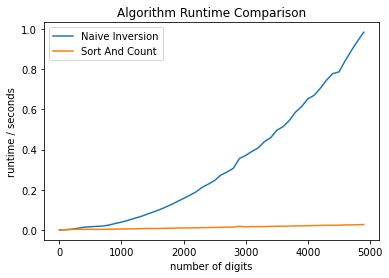

In [129]:
# plot the stored data
x = np.arange(1, 5001, 100)

plt.plot(x, time_naive, x, time_better)
plt.title("Algorithm Runtime Comparison")
plt.xlabel("number of digits")
plt.ylabel("runtime / seconds")
plt.legend(['Naive Inversion', 'Sort And Count'])
plt.show()

In [127]:
#test accuracy on 10 digits- to help you check if your code is giving the correct answer, you should first run
#on an array with the first 10 digits of π. Your answer should be 15.

pi_digits = read_pi(10)
SortAndCount(pi_digits)

([1, 1, 2, 3, 3, 4, 5, 5, 6, 9], 15)

In [128]:
#2d) What is the number of inversions in A1000000, that is, what is the number of inversions in the first
#million digits of π? 

pi_digits = read_pi(1000000)
print(SortAndCount(pi_digits)[1])

224964173233


number of inversions in the first 1 million pi digits: 224964173233